Источники данных:

https://www.dabeaz.com/generators/

https://github.com/dabeaz/generators

In [1]:
import pandas as pd


In [2]:
w = pd.read_csv('data/access-log', 
                sep=' ', 
                index_col=False, 
                names=['ip', '1', '2', 'date', 'tz', 'get', 'status', 'bytes'])

In [3]:
w

,ip,1,2,date,tz,get,status,bytes
0,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /ply/ply.html HTTP/1.1,200,97238
1,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /favicon.ico HTTP/1.1,404,133
2,75.54.118.139,-,-,[24/Feb/2008:00:15:40,-0600],GET / HTTP/1.1,200,4447
3,75.54.118.139,-,-,[24/Feb/2008:00:15:41,-0600],GET /images/Davetubes.jpg HTTP/1.1,200,60025
4,75.54.118.139,-,-,[24/Feb/2008:00:15:42,-0600],GET /favicon.ico HTTP/1.1,404,133
...,...,...,...,...,...,...,...,...
7293,80.161.85.77,-,-,[29/Feb/2008:07:47:40,-0600],GET /ply/example.html HTTP/1.1,200,2359
7294,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/ HTTP/1.1,200,8018
7295,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/bookplug.gif HTTP/1.1,200,23903
7296,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /favicon.ico HTTP/1.1,404,133


In [15]:
w['datetime'] = w['date'].str.replace(':',' ', 1).str.replace('[','', regex=False) + ' ' + w['tz'].str.replace(']','', regex=False)

In [24]:
pd.to_datetime(w['datetime']).dt.dayofweek

0       6
1       6
2       6
3       6
4       6
       ..
7293    4
7294    4
7295    4
7296    4
7297    4
Name: datetime, Length: 7298, dtype: int64

In [31]:
pd.Series.dt.day_of_week?

Type:        property
String form: <property object at 0x7fb618092ef0>
Docstring:  
The day of the week with Monday=0, Sunday=6.

Return the day of the week. It is assumed the week starts on
Monday, which is denoted by 0 and ends on Sunday which is denoted
by 6. This method is available on both Series with datetime
values (using the `dt` accessor) or DatetimeIndex.

Returns
-------
Series or Index
    Containing integers indicating the day number.

See Also
--------
Series.dt.dayofweek : Alias.
Series.dt.weekday : Alias.
Series.dt.day_name : Returns the name of the day of the week.

Examples
--------
>>> s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
>>> s.dt.dayofweek
2016-12-31    5
2017-01-01    6
2017-01-02    0
2017-01-03    1
2017-01-04    2
2017-01-05    3
2017-01-06    4
2017-01-07    5
2017-01-08    6
Freq: D, dtype: int64


In [32]:
s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()

In [33]:
s

2016-12-31   2016-12-31
2017-01-01   2017-01-01
2017-01-02   2017-01-02
2017-01-03   2017-01-03
2017-01-04   2017-01-04
2017-01-05   2017-01-05
2017-01-06   2017-01-06
2017-01-07   2017-01-07
2017-01-08   2017-01-08
Freq: D, dtype: datetime64[ns]

In [35]:
s.dt.dayofweek

2016-12-31    5
2017-01-01    6
2017-01-02    0
2017-01-03    1
2017-01-04    2
2017-01-05    3
2017-01-06    4
2017-01-07    5
2017-01-08    6
Freq: D, dtype: int64

In [36]:
w['dt'] = pd.to_datetime(w['datetime'])

In [37]:
w

,ip,1,2,date,tz,get,status,bytes,datetime,dt
0,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /ply/ply.html HTTP/1.1,200,97238,24/Feb/2008 00:08:59 -0600,2008-02-24 00:08:59-06:00
1,140.180.132.213,-,-,[24/Feb/2008:00:08:59,-0600],GET /favicon.ico HTTP/1.1,404,133,24/Feb/2008 00:08:59 -0600,2008-02-24 00:08:59-06:00
2,75.54.118.139,-,-,[24/Feb/2008:00:15:40,-0600],GET / HTTP/1.1,200,4447,24/Feb/2008 00:15:40 -0600,2008-02-24 00:15:40-06:00
3,75.54.118.139,-,-,[24/Feb/2008:00:15:41,-0600],GET /images/Davetubes.jpg HTTP/1.1,200,60025,24/Feb/2008 00:15:41 -0600,2008-02-24 00:15:41-06:00
4,75.54.118.139,-,-,[24/Feb/2008:00:15:42,-0600],GET /favicon.ico HTTP/1.1,404,133,24/Feb/2008 00:15:42 -0600,2008-02-24 00:15:42-06:00
...,...,...,...,...,...,...,...,...,...,...
7293,80.161.85.77,-,-,[29/Feb/2008:07:47:40,-0600],GET /ply/example.html HTTP/1.1,200,2359,29/Feb/2008 07:47:40 -0600,2008-02-29 07:47:40-06:00
7294,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/ HTTP/1.1,200,8018,29/Feb/2008 07:49:28 -0600,2008-02-29 07:49:28-06:00
7295,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /ply/bookplug.gif HTTP/1.1,200,23903,29/Feb/2008 07:49:28 -0600,2008-02-29 07:49:28-06:00
7296,156.63.68.202,-,-,[29/Feb/2008:07:49:28,-0600],GET /favicon.ico HTTP/1.1,404,133,29/Feb/2008 07:49:28 -0600,2008-02-29 07:49:28-06:00


In [38]:
week = w['dt'].dt.dayofweek

In [40]:
wd = w[['ip', 'status']].copy()

In [42]:
wd['weekday'] = week

In [43]:
wd

,ip,status,weekday
0,140.180.132.213,200,6
1,140.180.132.213,404,6
2,75.54.118.139,200,6
3,75.54.118.139,200,6
4,75.54.118.139,404,6
...,...,...,...
7293,80.161.85.77,200,4
7294,156.63.68.202,200,4
7295,156.63.68.202,200,4
7296,156.63.68.202,404,4


In [44]:
wd['bytes'] = pd.to_numeric(w['bytes'].str.replace('-','0'))

In [45]:
wd

,ip,status,weekday,bytes
0,140.180.132.213,200,6,97238
1,140.180.132.213,404,6,133
2,75.54.118.139,200,6,4447
3,75.54.118.139,200,6,60025
4,75.54.118.139,404,6,133
...,...,...,...,...
7293,80.161.85.77,200,4,2359
7294,156.63.68.202,200,4,8018
7295,156.63.68.202,200,4,23903
7296,156.63.68.202,404,4,133


In [51]:
wd.groupby('weekday').sum('bytes')

,status,bytes
weekday,,
0,329290,62507530
1,389679,67520952
2,369903,30690802
3,504989,35088107
4,83084,5118445
6,257000,29815994


<AxesSubplot:xlabel='weekday'>

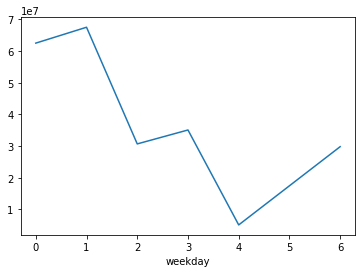

In [49]:
wd.groupby('weekday').sum('bytes')['bytes'].plot()

<AxesSubplot:xlabel='weekday'>

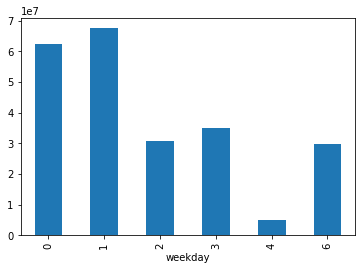

In [50]:
wd.groupby('weekday').sum('bytes')['bytes'].plot.bar()

In [54]:
wd.groupby('weekday').count()

,ip,status,bytes
weekday,,,
0,1264,1264,1264
1,1440,1440,1440
2,1390,1390,1390
3,1952,1952,1952
4,316,316,316
6,936,936,936


<AxesSubplot:xlabel='weekday'>

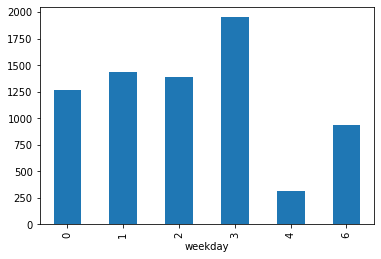

In [56]:
wd.groupby('weekday').count()['ip'].plot.bar()

In [58]:
wd.groupby('weekday').mean()

,status,bytes
weekday,,
0,260.514241,49452.159810
1,270.610417,46889.550000
2,266.117266,22079.713669
3,258.703381,17975.464652
4,262.924051,16197.610759
6,274.572650,31854.694444


<AxesSubplot:xlabel='weekday'>

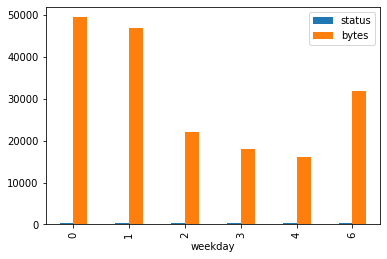

In [59]:
wd.groupby('weekday').mean().plot.bar()

In [65]:
wd.groupby('ip').count().sort_values('weekday')

,status,weekday,bytes
ip,,,
61.247.217.38,1,1,1
198.54.202.194,1,1,1
74.6.23.225,1,1,1
74.6.23.41,1,1,1
74.6.23.48,1,1,1
...,...,...,...
67.228.115.170,49,49,49
201.236.226.90,61,61,61
66.249.65.37,65,65,65


<AxesSubplot:xlabel='ip'>

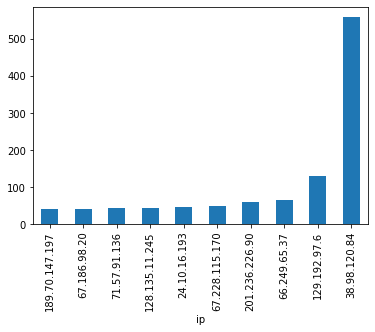

In [71]:
wd.groupby('ip').count().sort_values('weekday')['weekday'].tail(10).plot.bar()

In [76]:
wd[['ip', 'bytes']].groupby('ip').sum('bytes').sort_values('bytes').tail(10)

,bytes
ip,
98.206.164.173,4941409
99.140.232.220,4975248
75.22.21.146,4986048
69.209.71.13,5233160
128.135.125.239,5623128
128.135.24.9,5685359
38.98.120.84,7340440
24.15.187.198,9958647
98.193.69.179,10049252


<AxesSubplot:xlabel='ip'>

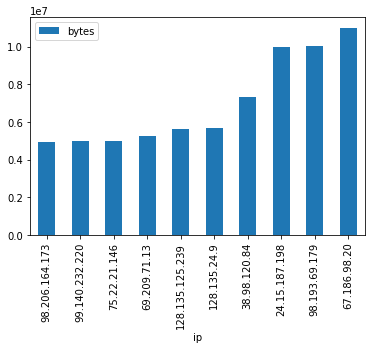

In [79]:
wd[['ip', 'bytes']].groupby('ip').sum('bytes').sort_values('bytes').tail(10).plot.bar()

In [83]:
wd[['ip','status']].groupby('status').count().sort_values('ip')

,ip
status,
403,18
206,51
301,83
302,89
304,328
404,2053
200,4676


<AxesSubplot:xlabel='status'>

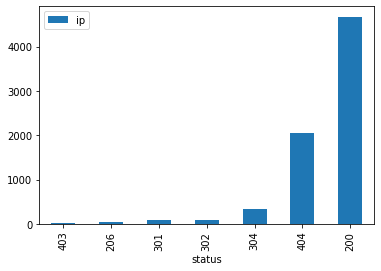

In [84]:
wd[['ip','status']].groupby('status').count().sort_values('ip').plot.bar()

In [85]:
wd

,ip,status,weekday,bytes
0,140.180.132.213,200,6,97238
1,140.180.132.213,404,6,133
2,75.54.118.139,200,6,4447
3,75.54.118.139,200,6,60025
4,75.54.118.139,404,6,133
...,...,...,...,...
7293,80.161.85.77,200,4,2359
7294,156.63.68.202,200,4,8018
7295,156.63.68.202,200,4,23903
7296,156.63.68.202,404,4,133


In [89]:
wd.pivot_table(
    values  = 'bytes',
    index   = 'weekday',
    columns = 'status',
    aggfunc = 'sum',
)

status,200,206,301,302,304,403,404
weekday,,,,,,,
0,48006736.0,14451458.0,3602.0,1587.0,0.0,257.0,43890.0
1,62969096.0,4487031.0,3110.0,2796.0,0.0,NaN,58919.0
2,30093020.0,537635.0,2360.0,2112.0,0.0,214.0,55461.0
3,33150172.0,1857977.0,10004.0,2784.0,0.0,3596.0,63574.0
4,4695528.0,409600.0,NaN,2943.0,0.0,NaN,10374.0
6,28451841.0,1319190.0,944.0,3321.0,0.0,NaN,40698.0


In [90]:
wd.pivot_table(
    values  = 'bytes',
    index   = 'weekday',
    columns = 'status',
    aggfunc = 'sum',
    margins = True
)

status,200,206,301,302,304,403,404,All
weekday,,,,,,,,
0,48006736.0,14451458.0,3602.0,1587.0,0.0,257.0,43890.0,62507530
1,62969096.0,4487031.0,3110.0,2796.0,0.0,NaN,58919.0,67520952
2,30093020.0,537635.0,2360.0,2112.0,0.0,214.0,55461.0,30690802
3,33150172.0,1857977.0,10004.0,2784.0,0.0,3596.0,63574.0,35088107
4,4695528.0,409600.0,NaN,2943.0,0.0,NaN,10374.0,5118445
6,28451841.0,1319190.0,944.0,3321.0,0.0,NaN,40698.0,29815994
All,207366393.0,23062891.0,20020.0,15543.0,0.0,4067.0,272916.0,230741830


In [91]:
wd.pivot_table(
    values  = 'bytes',
    index   = 'weekday',
    columns = 'status',
    aggfunc = 'count',
)

status,200,206,301,302,304,403,404
weekday,,,,,,,
0,833.0,15.0,15.0,9.0,60.0,1.0,331.0
1,881.0,7.0,13.0,16.0,80.0,NaN,443.0
2,903.0,5.0,10.0,12.0,42.0,1.0,417.0
3,1316.0,8.0,41.0,16.0,77.0,16.0,478.0
4,191.0,9.0,NaN,17.0,21.0,NaN,78.0
6,552.0,7.0,4.0,19.0,48.0,NaN,306.0


<AxesSubplot:xlabel='weekday'>

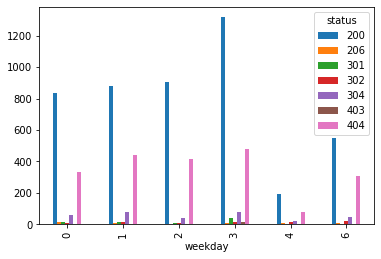

In [95]:
wd.pivot_table(
    values  = 'bytes',
    index   = 'weekday',
    columns = 'status',
    aggfunc = 'count',
).plot.bar()

<AxesSubplot:xlabel='weekday'>

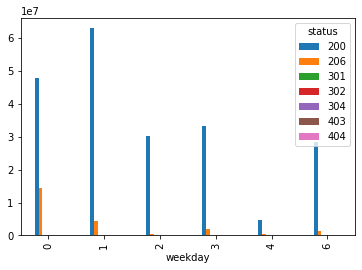

In [97]:
wd.pivot_table(
    values  = 'bytes',
    index   = 'weekday',
    columns = 'status',
    aggfunc = 'sum',
).plot.bar()

In [98]:
wd.pivot_table(
    values  = 'bytes',
    index   = 'ip',
    columns = 'weekday',
    aggfunc = 'count',
)

weekday,0,1,2,3,4,6
ip,,,,,,
116.94.207.182,NaN,NaN,NaN,NaN,NaN,3.0
117.198.144.124,NaN,NaN,NaN,NaN,NaN,2.0
117.47.114.193,NaN,NaN,NaN,NaN,2.0,NaN
118.172.30.90,NaN,NaN,1.0,NaN,NaN,NaN
118.83.147.252,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
99.167.100.246,NaN,7.0,NaN,NaN,NaN,NaN
99.167.103.107,NaN,NaN,NaN,NaN,NaN,5.0
99.226.226.178,NaN,NaN,1.0,NaN,NaN,NaN
